In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.shape

(400, 5)

In [ ]:
x = df.iloc[:,2:4]
y = df.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

print(x_test[:10])
print('-'*15)
print(pred[:10])

[[ 0.79753468 -1.40447546]
 [ 2.07309956  0.51542886]
 [-0.96863208 -0.76450736]
 [ 0.99377543  0.74814454]
 [-0.87051171 -1.22993871]
 [-0.77239133 -0.24089709]
 [ 0.89565505  1.06812859]
 [-0.87051171  0.36998156]
 [ 0.20881242  0.13726589]
 [ 0.40505317 -0.15362871]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [ ]:
print('Expected Output:',pred[:10])
print('-'*15)
print('Predicted Output:\n',y_test[:10])

Expected Output: [0 1 0 1 0 0 1 0 0 0]
---------------
Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[50  2]
 [ 9 19]]


<Figure size 864x720 with 0 Axes>

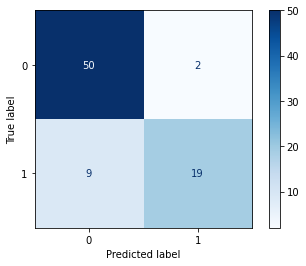

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))

print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))

print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))

print('Specificity (True negative rate) :',tn/(fp+tn))

print('Precision (Positive predictive value) :',tp/(tp+fp))

print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.86
Error Rate:  0.1375
Sensitivity (Recall or True positive rate) : 0.6785714285714286
Specificity (True negative rate) : 0.9615384615384616
Precision (Positive predictive value) : 0.9047619047619048
False Positive Rate : 0.038461538461538464
